# Importing Libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.model_selection import KFold,cross_val_score

# Loading Dataset

In [2]:
df=pd.read_csv('C:\\Users\\RANA ASIM\\Downloads\\archive\\emails.csv',nrows=4000)
df

,text,spam,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109
0,Subject: naturally irresistible your corporate...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Subject: the stock trading gunslinger fanny i...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Subject: unbelievable new homes made easy im ...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Subject: 4 color printing special request add...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Subject: do not have money , get software cds ...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Subject: re : analyst candidate mitra mujica ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3996,Subject: it ' s time for prc it ' s time once...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3997,Subject: dinner with vince kaminski good morn...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3998,"Subject: re : tradespark vince , thanks for ...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 110 entries, text to Unnamed: 109
dtypes: float64(1), object(109)
memory usage: 3.4+ MB


# Drop all columns except text and Spam

In [4]:
df=df.iloc[:,:2]
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
3995,Subject: re : analyst candidate mitra mujica ...,0
3996,Subject: it ' s time for prc it ' s time once...,0
3997,Subject: dinner with vince kaminski good morn...,0
3998,"Subject: re : tradespark vince , thanks for ...",0


# Data Preprocessing

In [5]:
df.isnull().sum()

text    0
spam    2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4000 non-null   object
 1   spam    3998 non-null   object
dtypes: object(2)
memory usage: 62.6+ KB


In [7]:
df.dropna(inplace=True)
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
3995,Subject: re : analyst candidate mitra mujica ...,0
3996,Subject: it ' s time for prc it ' s time once...,0
3997,Subject: dinner with vince kaminski good morn...,0
3998,"Subject: re : tradespark vince , thanks for ...",0


In [8]:
df['spam'].value_counts()

0                                                                                               2629
1                                                                                               1367
 its termination would not  have such a phenomenal impact on the power situation .  however        1
 mr suresh prabhu                                                                                  1
Name: spam, dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(3984, 2)

In [22]:
x=df['text']
y=df['spam']

# Feature Extraction

In [28]:
cv=CountVectorizer()
x=cv.fit_transform(x)

In [29]:
x

<3984x32873 sparse matrix of type '<class 'numpy.int64'>'
	with 481826 stored elements in Compressed Sparse Row format>

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3984 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3984 non-null   object
 1   spam    3984 non-null   object
dtypes: object(2)
memory usage: 93.4+ KB


# Split Data into Train and Test

In [31]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print('sahpe of X_train',X_train.shape)
print('sahpe of y_train',y_train.shape)
print('sahpe of X_test',X_test.shape)
print('sahpe of y_test',y_test.shape)

sahpe of X_train (2788, 32873)
sahpe of y_train (2788,)
sahpe of X_test (1196, 32873)
sahpe of y_test (1196,)


# Naive Bayes Classifier

In [32]:
mbayes=MultinomialNB()
mbayes.fit(X_train,y_train)

MultinomialNB()

In [33]:
y_pred=mbayes.predict(X_test)
y_pred

array(['1', '0', '1', ..., '0', '1', '1'], dtype='<U92')

In [34]:
y_test

408     1
2552    0
682     1
3168    0
2359    0
       ..
2884    0
3625    0
1941    0
1037    1
208     1
Name: spam, Length: 1196, dtype: object

In [35]:
mbayes.score(X_test,y_test)

0.9899665551839465

# Logistic Regression

In [36]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\RANA ASIM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred1=lr.predict(X_test)

# Support Vector Classifier (rbf)

In [38]:
c_rbf=SVC(kernel='rbf')
c_rbf.fit(X_train,y_train)


SVC()

In [39]:
y_pred2=c_rbf.predict(X_test)

# Using Linear Kernal

In [40]:
c_linear=SVC(kernel='linear')
c_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [41]:
y_pred3=c_linear.predict(X_test)

# Accuracy Score

In [42]:
print('Accuracy of Naive Bayes',accuracy_score(y_test,y_pred))
print('Accuracy of Logistic Regression',accuracy_score(y_test,y_pred1))
print('Accuracy of Support vector(rbf)',accuracy_score(y_test,y_pred2))
print('Accuracy of Support vector(Kernal)',accuracy_score(y_test,y_pred3))

Accuracy of Naive Bayes 0.9899665551839465
Accuracy of Logistic Regression 0.9882943143812709
Accuracy of Support vector(rbf) 0.9707357859531772
Accuracy of Support vector(Kernal) 0.979933110367893


# Confusion Matrix

<Axes: >

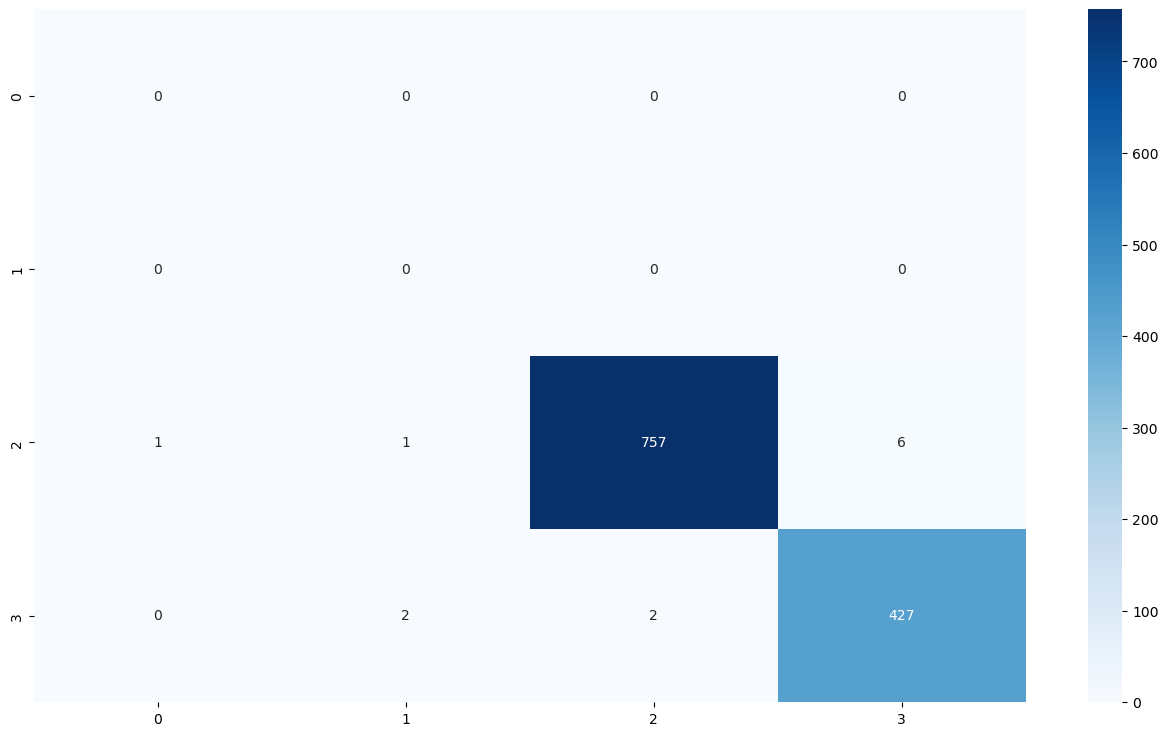

In [50]:
plt.figure(figsize=(16,9))
df=pd.DataFrame(confusion_matrix(y_test,y_pred))
sns.heatmap(df,annot=True, fmt='d',cmap=plt.cm.Blues)

# Classification Report

In [44]:
print(classification_report(y_test,y_pred))

                                                                                              precision    recall  f1-score   support

 its termination would not  have such a phenomenal impact on the power situation .  however        0.00      0.00      0.00         0
                                                                           mr suresh prabhu        0.00      0.00      0.00         0
                                                                                           0       1.00      0.99      0.99       765
                                                                                           1       0.99      0.99      0.99       431

                                                                                    accuracy                           0.99      1196
                                                                                   macro avg       0.50      0.50      0.50      1196
                                                            

C:\Users\RANA ASIM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RANA ASIM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RANA ASIM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model Overfit or Not

In [51]:
cvs=cross_val_score(mbayes,X_train,y_train,cv=10)
cvs, cvs.mean()

C:\Users\RANA ASIM\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


(array([0.98924731, 0.99641577, 0.98924731, 0.97491039, 0.98207885,
        0.98566308, 0.98566308, 0.96415771, 0.98561151, 0.98201439]),
 0.9835009411825377)

# To Save Model

In [55]:
import joblib
joblib.dump(lr,'Email Spam Detection.pkl')

['Email Spam Detection.pkl']